In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('data/HistoricalData_AAPL.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/21/2023,$191.94,71904040,$194.10,$194.97,$191.23
1,07/20/2023,$193.13,59581200,$195.09,$196.47,$192.495
2,07/19/2023,$195.10,80507320,$193.10,$198.23,$192.65
3,07/18/2023,$193.73,48353770,$193.35,$194.33,$192.415
4,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81


In [4]:
# explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [5]:
# change Date Column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# change Close/Last to float and rename to close
df['Close/Last'] = df['Close/Last'].str.replace('$', '')
df['Close/Last'] = df['Close/Last'].astype(float)
df.rename(columns={'Close/Last': 'Close'}, inplace=True)

# change Open to float
df['Open'] = df['Open'].str.replace('$', '').astype(float)

# change High to float
df['High'] = df['High'].str.replace('$', '').astype(float)

# change Low to float
df['Low'] = df['Low'].str.replace('$', '').astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   Volume  2517 non-null   int64         
 3   Open    2517 non-null   float64       
 4   High    2517 non-null   float64       
 5   Low     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [6]:
(df.head())

,Date,Close,Volume,Open,High,Low
0,2023-07-21,191.94,71904040,194.10,194.97,191.230
1,2023-07-20,193.13,59581200,195.09,196.47,192.495
2,2023-07-19,195.10,80507320,193.10,198.23,192.650
3,2023-07-18,193.73,48353770,193.35,194.33,192.415
4,2023-07-17,193.99,50520160,191.90,194.32,191.810


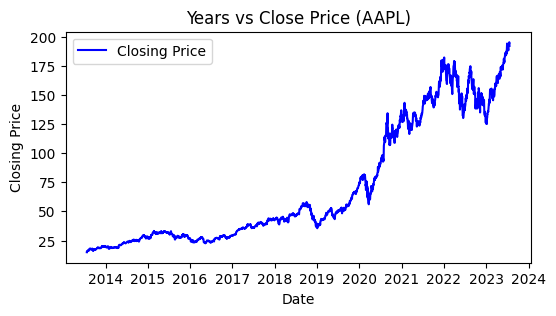

In [7]:
# Line plot for stock prices over time
plt.figure(figsize=(6, 3))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Years vs Close Price (AAPL)')
plt.legend()
plt.show()

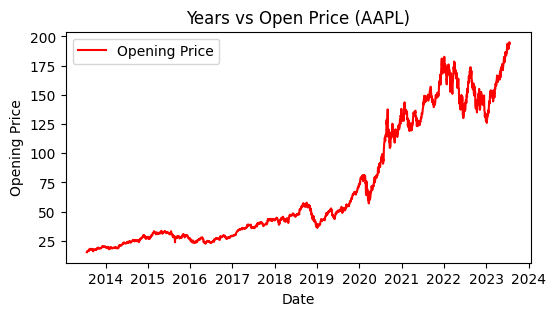

In [8]:
# Line plot for stock prices over time
plt.figure(figsize=(6, 3))
plt.plot(df['Date'], df['Open'], label='Opening Price', color='red')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Years vs Open Price (AAPL)')
plt.legend()

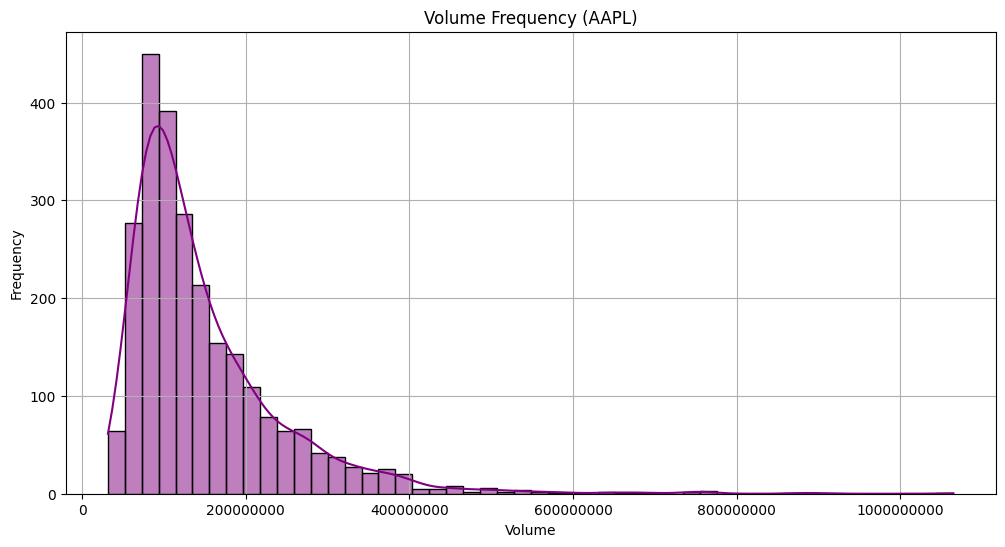

In [9]:
# Histogram of daily volume
# make xlabel show actual value instead of scientific notation
plt.figure(figsize=(12, 6))
sns.histplot(df['Volume'], bins=50, kde=True, color='purple')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Volume Frequency (AAPL)')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)
plt.show()



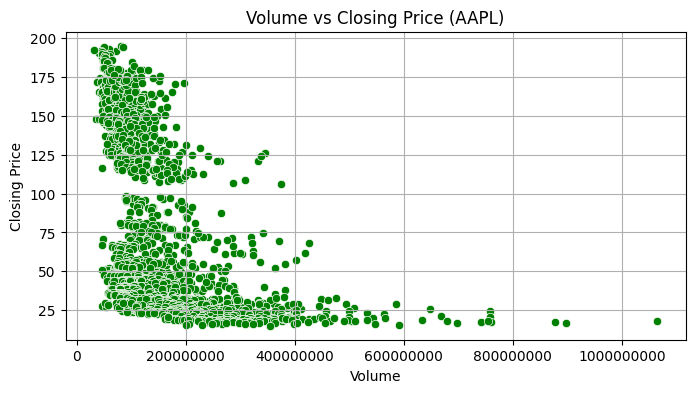

In [10]:
# find relationship between volume and closing price
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['Volume'], y=df['Close'], color='green')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs Closing Price (AAPL)')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)
plt.show()


In [11]:
# save dataframe to csv
df.to_csv('data/AAPL.csv', index=False)